In [1]:
import os
os.chdir('/home/sam/capp-455136')
%matplotlib inline
from mlpipe import *

In [2]:
import pandas as pd

1.Prepare

In [3]:
train=prepare.csvtodf('pa2/Data/cs-training.csv')

In [4]:
len(train)

150000

In [5]:
train2=train.dropna()

In [6]:
len(train2)

120269

2.Describe

In [7]:
describe.summary_uni(train)

,max,min,mean,median,mode,std,missing
Unnamed: 0,150000.0,1.0,75000.500000,75000.500000,NaN,43301.414527,0.000000
SeriousDlqin2yrs,1.0,0.0,0.066840,0.000000,0.0,0.249746,0.000000
RevolvingUtilizationOfUnsecuredLines,50708.0,0.0,6.048438,0.154181,0.0,249.755371,0.000000
age,109.0,0.0,52.295207,52.000000,49.0,14.771866,0.000000
NumberOfTime30-59DaysPastDueNotWorse,98.0,0.0,0.421033,0.000000,0.0,4.192781,0.000000
DebtRatio,329664.0,0.0,353.005076,0.366508,0.0,2037.818523,0.000000
MonthlyIncome,3008750.0,0.0,6670.221237,5400.000000,5000.0,14384.674215,0.198207
NumberOfOpenCreditLinesAndLoans,58.0,0.0,8.452760,8.000000,6.0,5.145951,0.000000
NumberOfTimes90DaysLate,98.0,0.0,0.265973,0.000000,0.0,4.169304,0.000000
NumberRealEstateLoansOrLines,54.0,0.0,1.018240,1.000000,0.0,1.129771,0.000000


3.Feature

In [7]:
train2=train2.drop('Unnamed: 0', 1)

In [8]:
train2['income_bin20']=feature.discretize_bin(train,'MonthlyIncome',20)

In [9]:
train3=feature.transform_normall(train2,'SeriousDlqin2yrs')

4.Describe(2)

In [11]:
describe.summary_xy(train3,'SeriousDlqin2yrs')

,Top Features by Correlation,Top Features by Random Forest
0,NumberOfTime30-59DaysPastDueNotWorse,MonthlyIncome
1,NumberOfTimes90DaysLate,RevolvingUtilizationOfUnsecuredLines
2,age,DebtRatio
3,NumberOfTime60-89DaysPastDueNotWorse,age
4,NumberOfDependents,NumberOfTimes90DaysLate
5,NumberOfOpenCreditLinesAndLoans,NumberOfOpenCreditLinesAndLoans
6,MonthlyIncome,NumberOfTime30-59DaysPastDueNotWorse
7,DebtRatio,NumberOfTime60-89DaysPastDueNotWorse
8,NumberRealEstateLoansOrLines,NumberOfDependents
9,RevolvingUtilizationOfUnsecuredLines,NumberRealEstateLoansOrLines


In [10]:
features=['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio','MonthlyIncome', 'age']

5.Model and Evaluate

In [12]:
model.select_classifiers()

['KNN', 'DT', 'SVM', 'RF', 'LR', 'ET', 'AB', 'GB', 'NB', 'SGD']

In [13]:
classifier=['DT']

In [30]:
names=[]
for k in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    name=model.loop_clf(train3,features,'SeriousDlqin2yrs',classifier,k)
    names.append(name)
evak = pd.concat(names, axis=0)

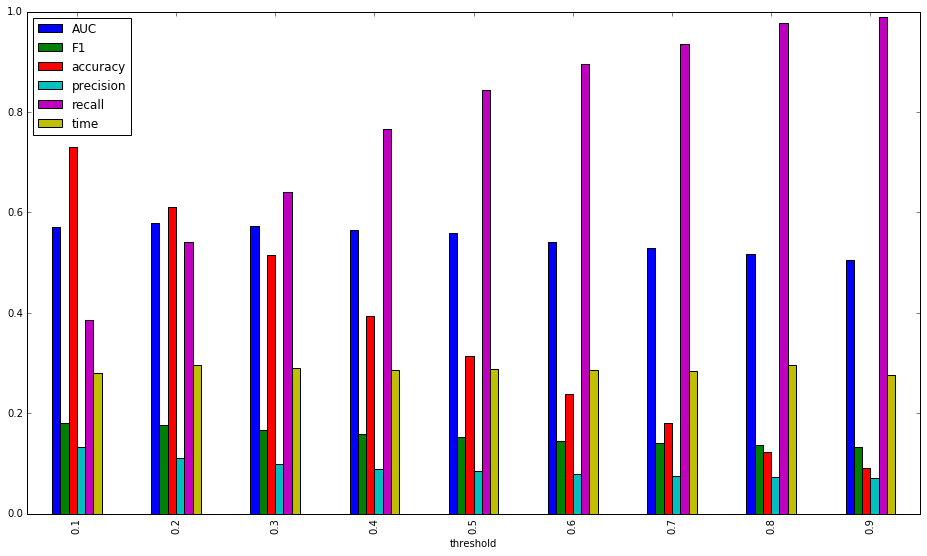

In [33]:
evak.groupby('threshold').mean().plot.bar(figsize=[16,9])

In [34]:
classifiers=['KNN','DT','LR','NB','SVM']
eva=model.loop_clf(train3,features,'SeriousDlqin2yrs',classifiers,0.1)

In [60]:
eva.to_csv('eva.csv')

In [ ]:
eva['class']=eva['classifier'].apply(lambda x: str(x)[:3])

In [47]:
eva = eva.drop('time', 1)

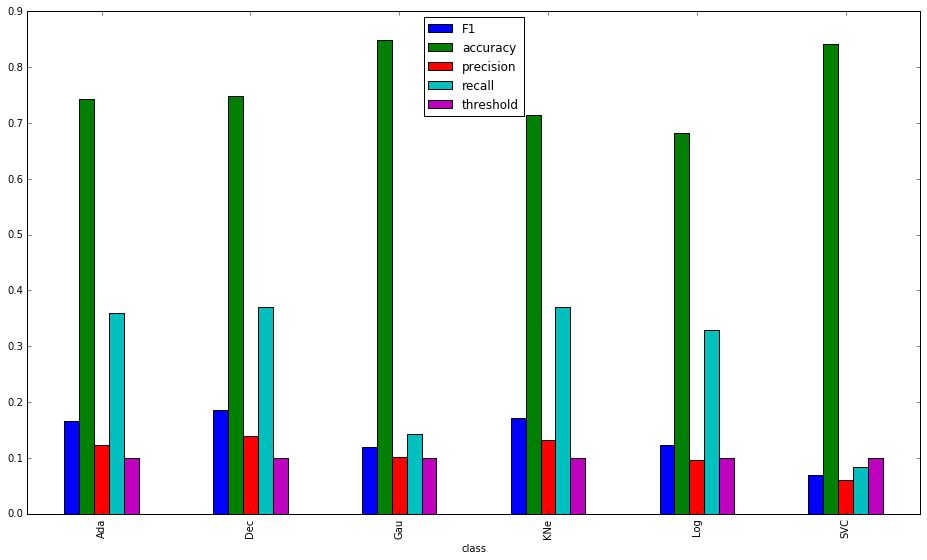

In [29]:
eva.groupby('class').mean().plot.bar(figsize=[16,9])

In [22]:
eva=pd.read_csv('eva.csv',index_col=0)

In [15]:
classifiers2=['GB','RF']
eva2=model.loop_clf(train3,features,'SeriousDlqin2yrs',classifiers2,0.1)

KeyboardInterrupt: 

In [ ]:
eva2.to_csv('eva2.csv')

In [13]:
classifiers3=['AB']
eva3=model.loop_clf(train3,features,'SeriousDlqin2yrs',classifiers3,0.1)

In [19]:
eva3 = eva3.drop('time', 1)
eva3['class']=eva3['classifier'].apply(lambda x: str(x)[:3])
eva3.to_csv('eva3.csv')

In [18]:
eva3

In [28]:
ev=pd.concat([eva1,eva2,ev3], axis=1)
ev.to_csv('ev.csv')

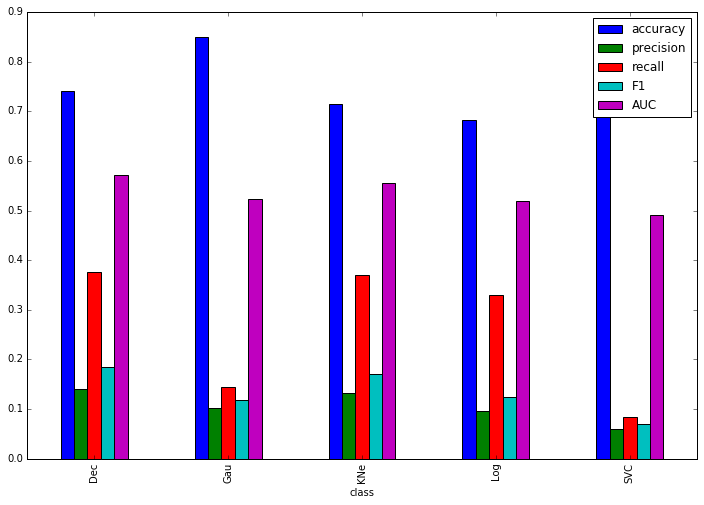

In [98]:
ev.groupby('class').mean().plot.bar(figsize=[12,8])